In [77]:
require('Synth')

data("basque")

dataprep.out = dataprep(foo = basque,
                        predictors= c("school.illit",
                                      "school.prim",
                                      "school.med",
                                      "school.high",
                                      "school.post.high",
                                      "invest"),
                        predictors.op = c("mean"),
                        dependent = c("gdpcap"),
                        unit.variable = c("regionno"),
                        time.variable = c("year"),
                        special.predictors = list(
                            list("gdpcap",1960:1969,c("mean")),                            
                            list("sec.agriculture",seq(1961,1969,2),c("mean")),
                            list("sec.energy",seq(1961,1969,2),c("mean")),
                            list("sec.industry",seq(1961,1969,2),c("mean")),
                            list("sec.construction",seq(1961,1969,2),c("mean")),
                            list("sec.services.venta",seq(1961,1969,2),c("mean")),
                            list("sec.services.nonventa",seq(1961,1969,2),c("mean")),
                            list("popdens",1969,c("mean"))),
                        treatment.identifier = 17,
                        controls.identifier = c(2:16,18),
                        time.predictors.prior = c(1964:1969),
                        time.optimize.ssr = c(1960:1969),
                        unit.names.variable = c("regionname"),
                        time.plot = c(1955:1997))



In [74]:
# combine the highest and second highest schooling category and eliminate highest
dataprep.out$X1["school.high",] = dataprep.out$X1["school.high", ] + dataprep.out$X1["school.post.high", ]
dataprep.out$X1 = as.matrix(dataprep.out$X1[-which(rownames(dataprep.out$X1) == "school.post.high"),])

dataprep.out$X0["school.high",] = dataprep.out$X0["school.high", ] + dataprep.out$X0["school.post.high",]
dataprep.out$X0 = as.matrix(dataprep.out$X0[-which(rownames(dataprep.out$X0) == "school.post.high"),])

# make total and compute shares for the shooling categories
lowest = which(rownames(dataprep.out$X0) == "school.illit")
highest = which(rownames(dataprep.out$X0) == "school.high")

dataprep.out$X1[lowest:highest,] = (100*dataprep.out$X1[lowest:highest,])/sum(dataprep.out$X1[lowest:highest,])
dataprep.out$X0[lowest:highest,] = 100*scale(dataprep.out$X0[lowest:highest,], center = FALSE,
                                            scale = colSums(dataprep.out$X0[lowest:highest,]))

In [75]:
synth.out = synth(data.prep.obj = dataprep.out)
synth.tables = synth.tab(dataprep.res = dataprep.out, synth.res = synth.out)


X1, X0, Z1, Z0 all come directly from dataprep object.


**************** 
 searching for synthetic control unit  
 

**************** 
**************** 
**************** 

MSPE (LOSS V): 2.148369e-06 

solution.v:
 0.07256724 0.08210843 0.08906817 0.08594517 0.09721623 0.07220468 0.09358057 0.1265734 0.04447118 0.04743431 0.07883799 0.04408006 0.06591259 

solution.w:
 0.0007653599 2.3514e-06 0.1636267 3.2293e-06 0.3365919 5.254e-07 2.05e-07 0.4503329 1.76816e-05 8.5592e-06 3.4e-09 6.664e-07 0.04864583 5.545e-07 3.003e-06 5.243e-07 



In [76]:
synth.tables$tab.w

,w.weights,unit.names,unit.numbers
2,0.001,Andalucia,2
3,0.000,Aragon,3
4,0.164,Principado De Asturias,4
5,0.000,Baleares (Islas),5
6,0.337,Canarias,6
7,0.000,Cantabria,7
8,0.000,Castilla Y Leon,8
9,0.450,Castilla-La Mancha,9
10,0.000,Cataluna,10
11,0.000,Comunidad Valenciana,11


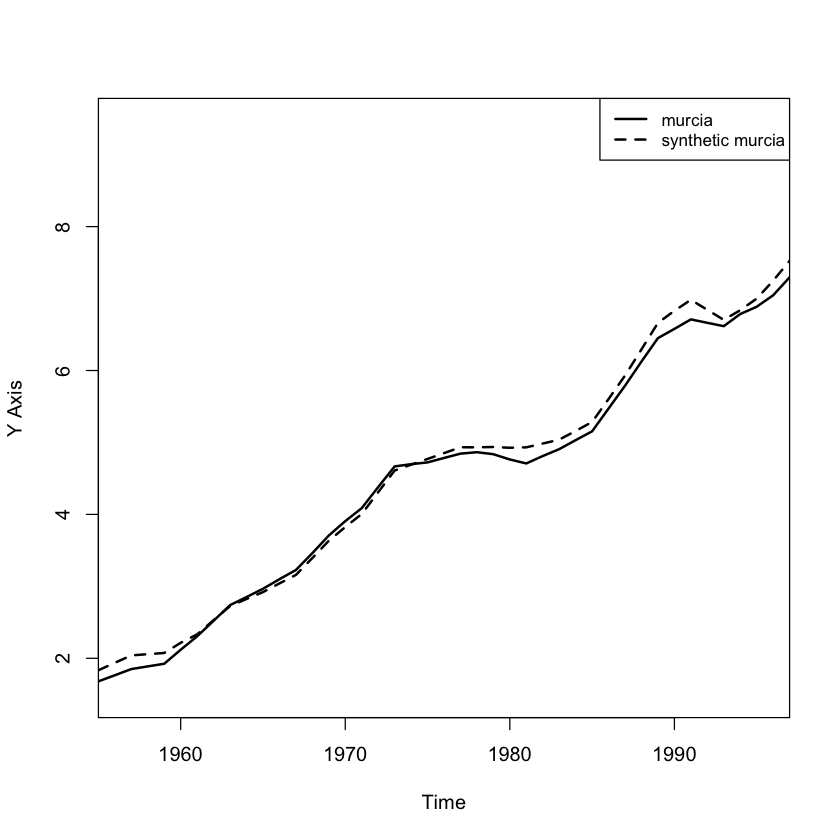

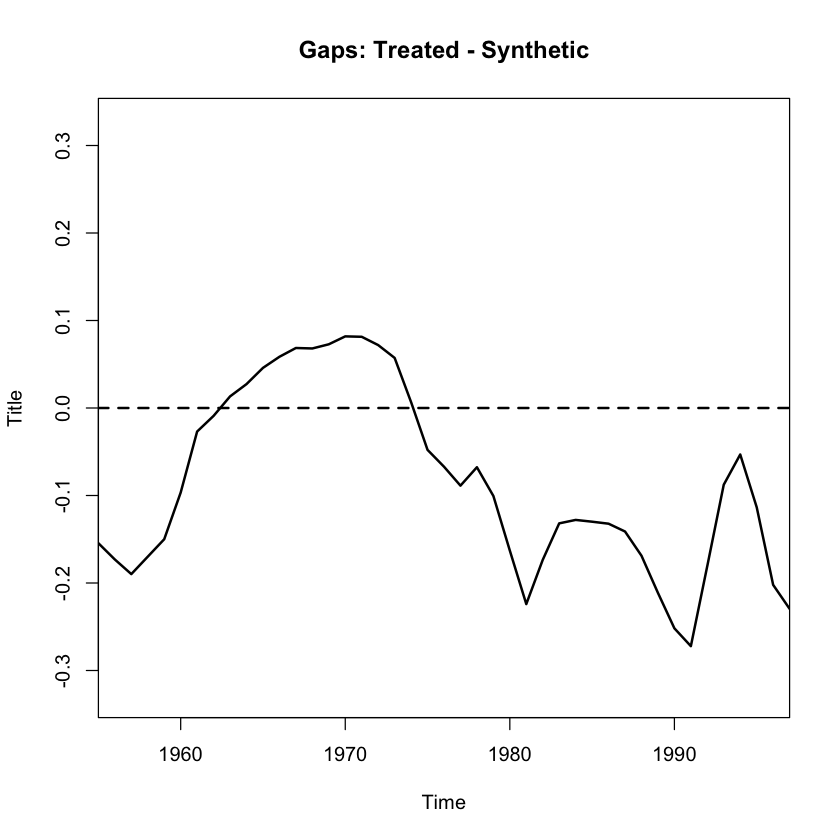

In [71]:
path.plot(synth.res = synth.out, dataprep.res = dataprep.out, Legend = c("murcia", "synthetic murcia"))
gaps.plot(synth.res = synth.out, dataprep.res = dataprep.out)
